# Problem:
**Binary Classification**: Tasked with developing machine learning models to predict whether clients of a Portuguese banking institution will subscribe to a term deposit, based on data from direct marketing campaigns involving phone calls.

**Term Deposit** - A term deposit is a savings account with a fixed period (term) during which money is deposited. It offers a fixed interest rate, providing a predictable return. Interest is paid at the end of the term, and the principal is typically protected. Withdrawals before the term's end may incur penalties. It's a low-risk, stable investment option for those seeking a guaranteed return over a specific period.


# Import Libraries

In [2137]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [2138]:
df = pd.read_csv('train.csv')

In [2139]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no


# Data Analysis

It is evident that most people responded no to the survey, indicating that they would not subscribe to the term deposit.

In [2140]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

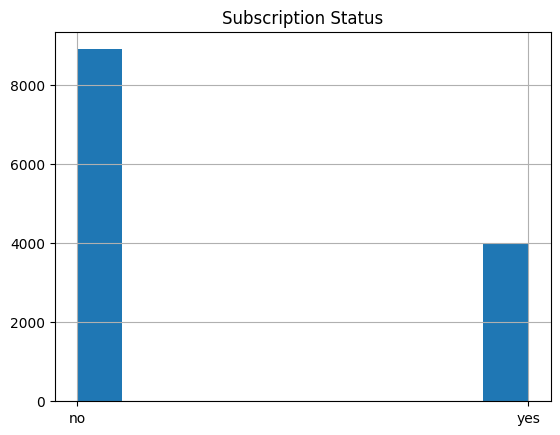

In [2141]:
df['y'].hist()
plt.title('Subscription Status')
plt.show()

## Demographic Variables

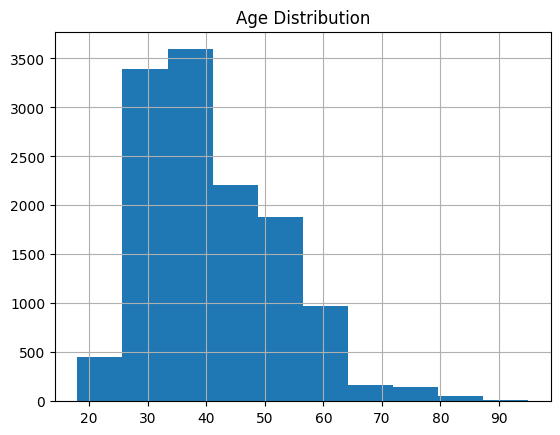

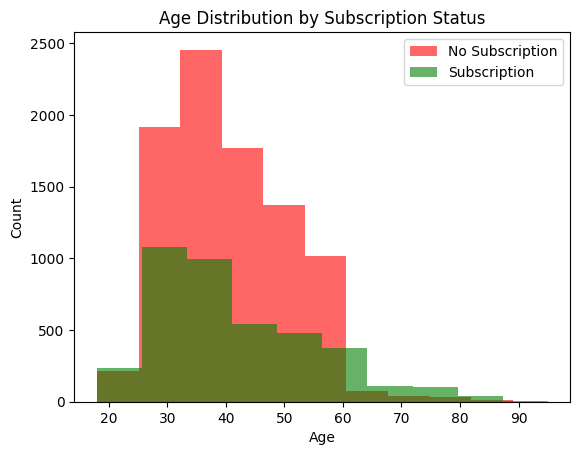

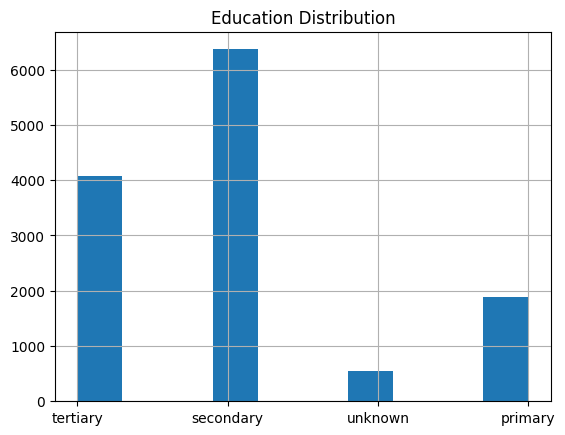

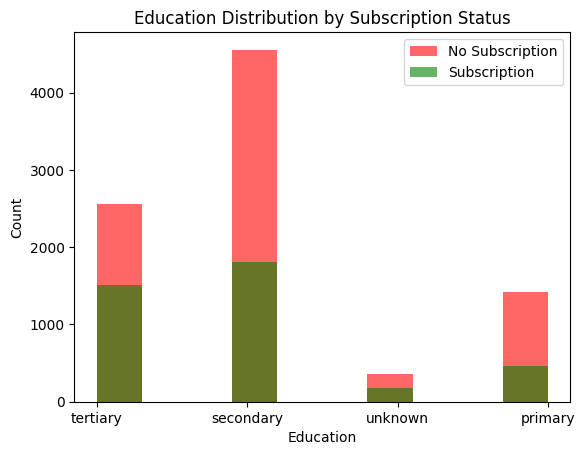

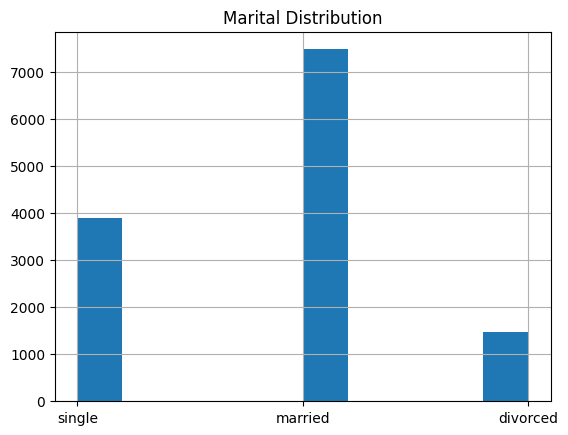

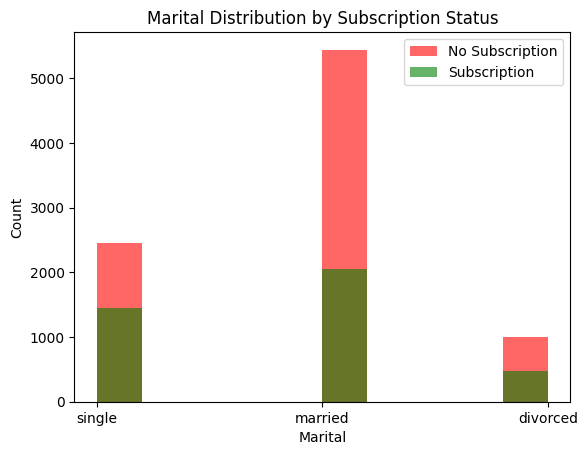

In [2142]:
variables = ['age', 'education', 'marital']
for var in variables:

    # Plotting the histogram for each variable
    df[var].hist()
    plt.title(f'{var.capitalize()} Distribution')
    plt.show()

    # Plotting the histogram for each variable by subscription status
    plt.hist(df[var][df['y'] == 'no'], color='red',alpha=0.6, label='No Subscription')
    plt.hist(df[var][df['y'] == 'yes'], color='green',alpha=0.6, label='Subscription')

    plt.title(f'{var.capitalize()} Distribution by Subscription Status')
    plt.xlabel(f'{var.capitalize()}')
    plt.ylabel('Count')
    plt.legend()

    plt.show()

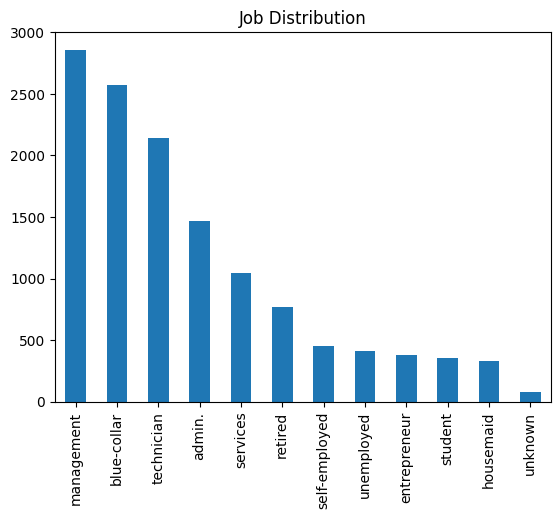

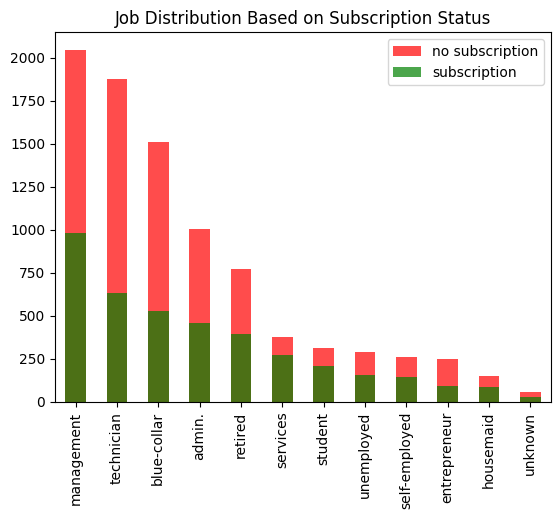

In [2143]:
df['job'].value_counts().plot(kind='bar')
plt.title('Job Distribution')
plt.show()

df['job'][df['y'] == 'no'].value_counts().plot(kind='bar', color='red', alpha=0.7, label='no subscription')
df['job'][df['y'] == 'yes'].value_counts().plot(kind='bar', color='green', alpha=0.7, label='subscription')
plt.title('Job Distribution Based on Subscription Status')
plt.legend()
plt.show()

## Financial Variables

The majority of individuals who indicated yes to subscribing to a term deposit do not have any personal loans nor are they in default on credit.

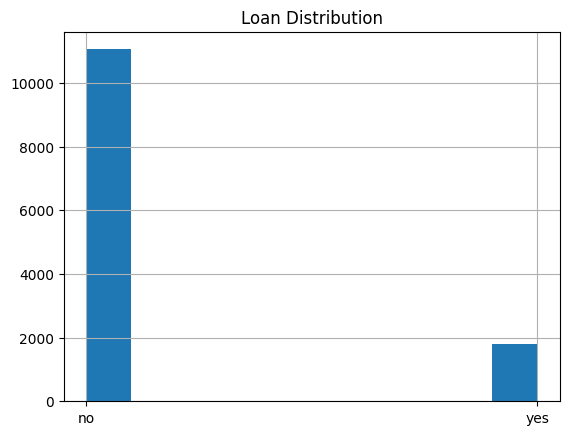

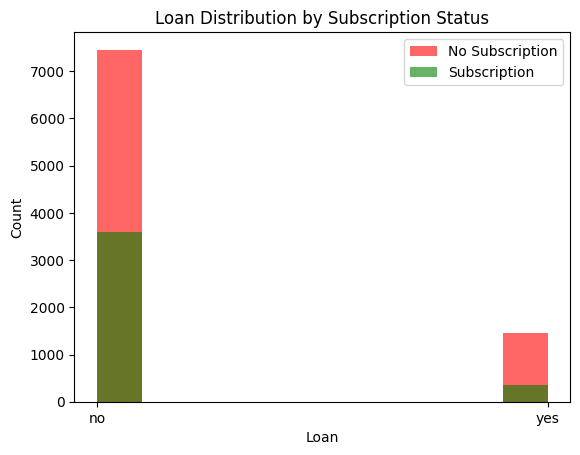

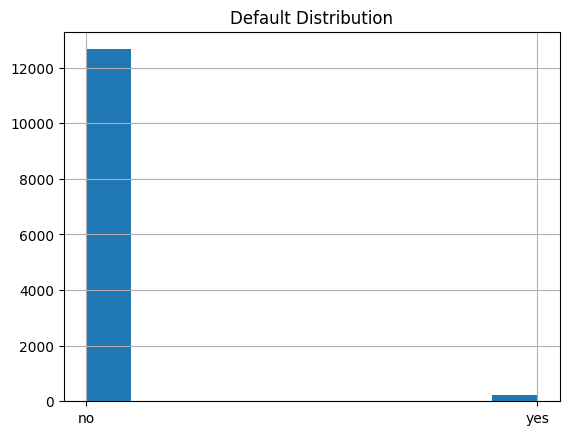

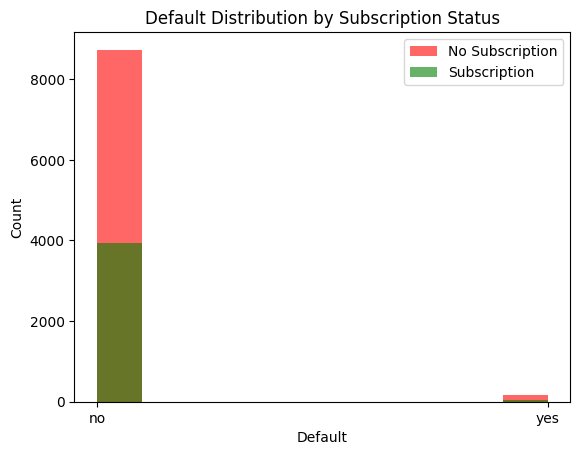

In [2144]:
variables = ['loan', 'default']
for var in variables:

    # Plotting the histogram for each variable
    df[var].hist()
    plt.title(f'{var.capitalize()} Distribution')
    plt.show()

    # Plotting the histogram for each variable by subscription status
    plt.hist(df[var][df['y'] == 'no'], color='red',alpha=0.6, label='No Subscription')
    plt.hist(df[var][df['y'] == 'yes'], color='green',alpha=0.6, label='Subscription')

    plt.title(f'{var.capitalize()} Distribution by Subscription Status')
    plt.xlabel(f'{var.capitalize()}')
    plt.ylabel('Count')
    plt.legend()

    plt.show()

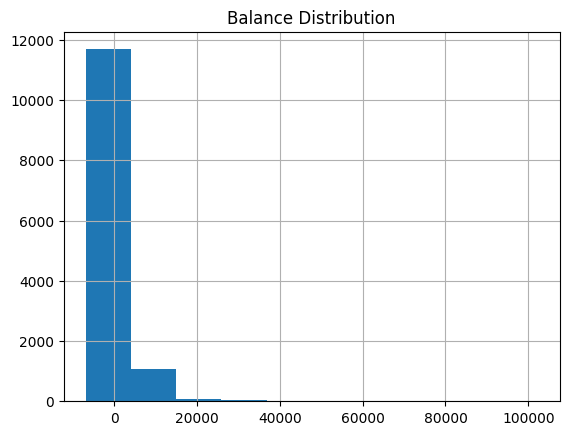

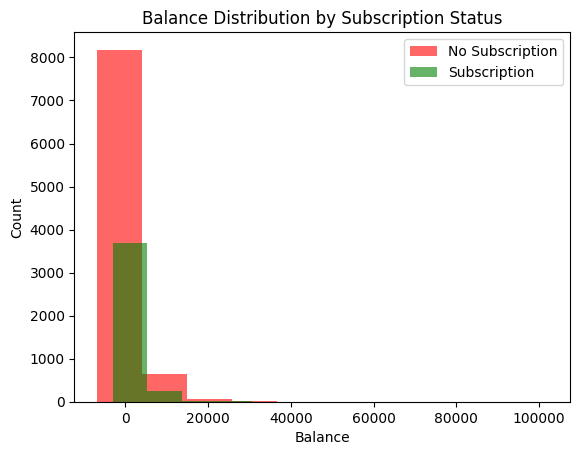

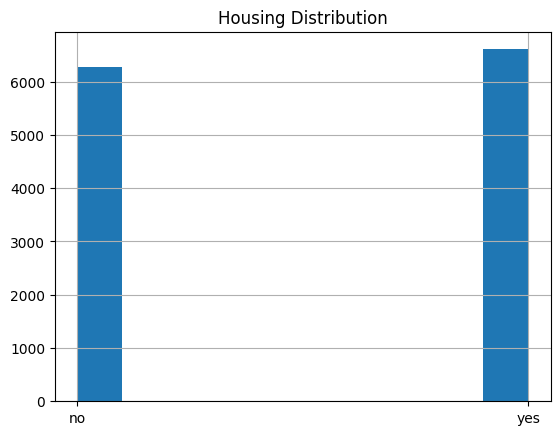

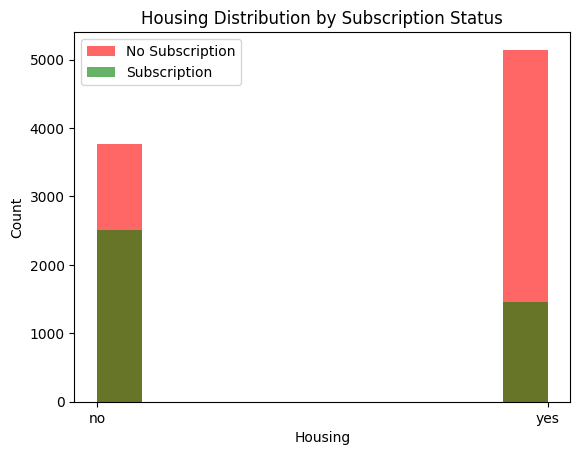

In [2145]:
variables = ['balance', 'housing']
for var in variables:

    # Plotting the histogram for each variable
    df[var].hist()
    plt.title(f'{var.capitalize()} Distribution')
    plt.show()

    # Plotting the histogram for each variable by subscription status
    plt.hist(df[var][df['y'] == 'no'], color='red',alpha=0.6, label='No Subscription')
    plt.hist(df[var][df['y'] == 'yes'], color='green',alpha=0.6, label='Subscription')

    plt.title(f'{var.capitalize()} Distribution by Subscription Status')
    plt.xlabel(f'{var.capitalize()}')
    plt.ylabel('Count')
    plt.legend()

    plt.show()

## Campaign History Variables

People who had success with a previous campaign are more likely to subscribe to the term deposit.

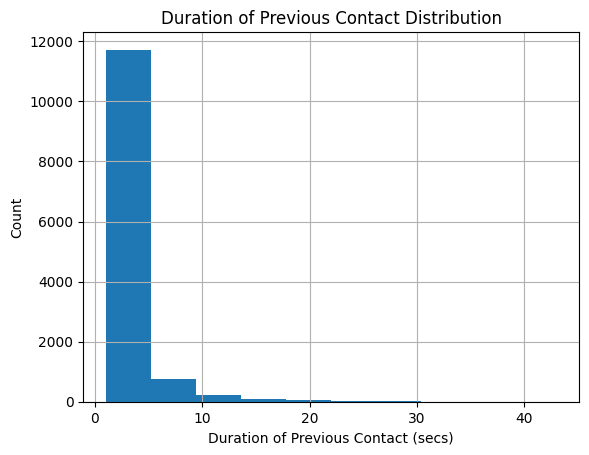

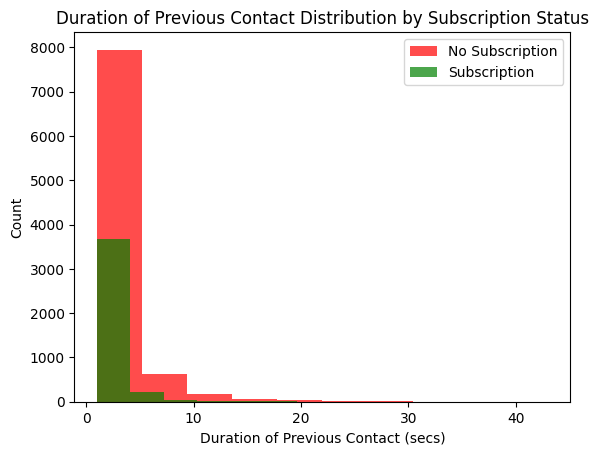

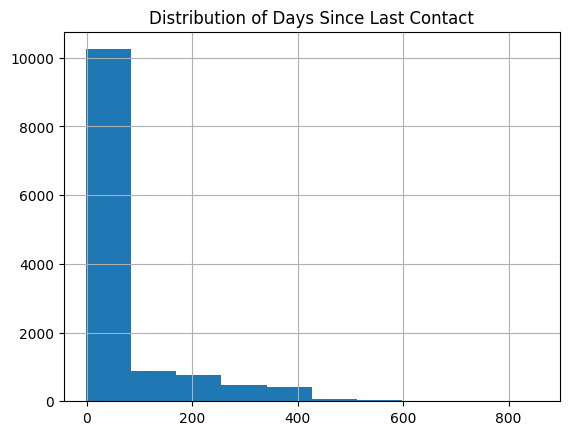

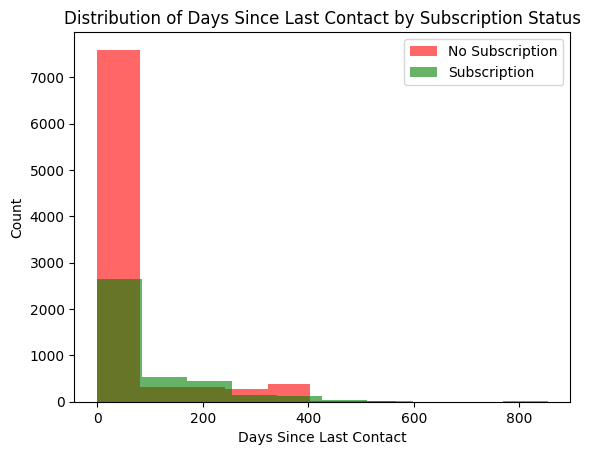

In [2146]:
df['campaign'].hist()
plt.title('Duration of Previous Contact Distribution')
plt.xlabel('Duration of Previous Contact (secs)')
plt.ylabel('Count')
plt.show()

plt.hist(df['campaign'][df['y'] == 'no'], color='red',alpha=0.7, label='No Subscription')
plt.hist(df['campaign'][df['y'] == 'yes'], color='green',alpha=0.7, label='Subscription')
plt.title('Duration of Previous Contact Distribution by Subscription Status')
plt.xlabel('Duration of Previous Contact (secs)')
plt.ylabel('Count')
plt.legend()
plt.show()

df['pdays'].hist()
plt.title('Distribution of Days Since Last Contact')
plt.show()

plt.hist(df['pdays'][df['y'] == 'no'], color='red',alpha=0.6, label='No Subscription')
plt.hist(df['pdays'][df['y'] == 'yes'], color='green',alpha=0.6, label='Subscription')
plt.title('Distribution of Days Since Last Contact by Subscription Status')
plt.xlabel('Days Since Last Contact')
plt.ylabel('Count')
plt.legend()
plt.show()


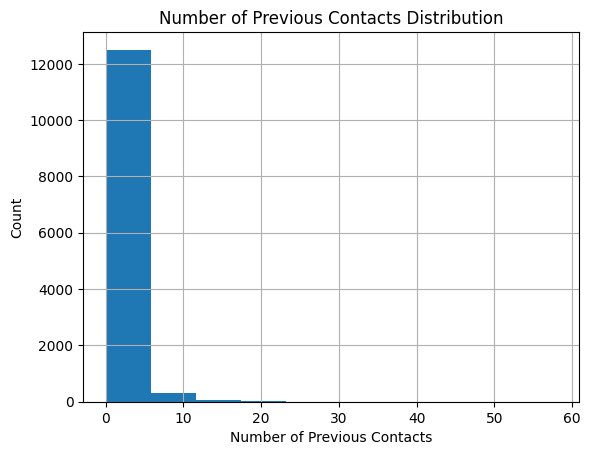

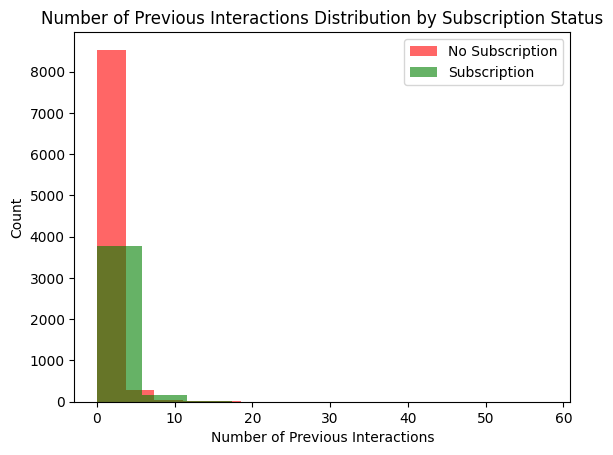

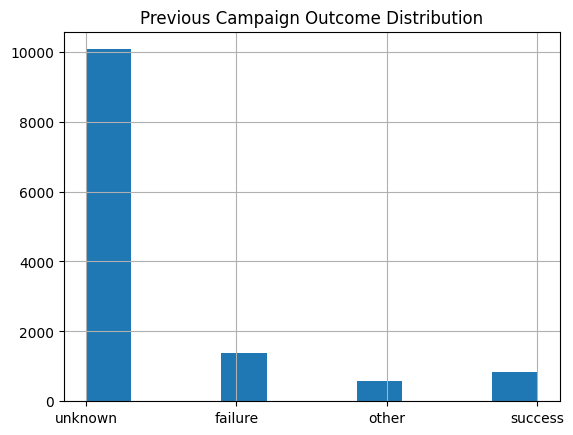

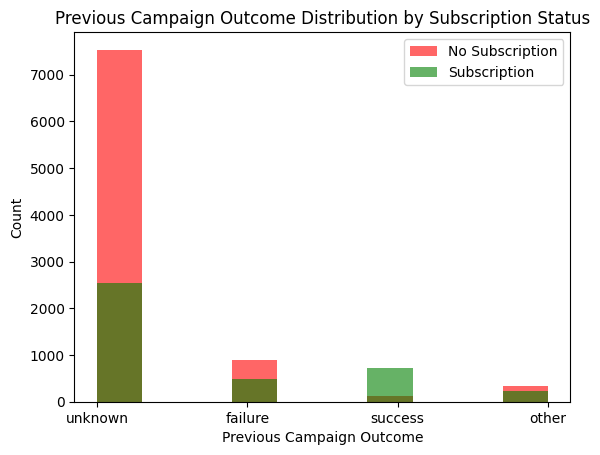

In [2147]:
df['previous'].hist()
plt.title('Number of Previous Contacts Distribution')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Count')
plt.show()

plt.hist(df['previous'][df['y'] == 'no'], color='red',alpha=0.6, label='No Subscription')
plt.hist(df['previous'][df['y'] == 'yes'], color='green',alpha=0.6, label='Subscription')
plt.title('Number of Previous Interactions Distribution by Subscription Status')
plt.xlabel('Number of Previous Interactions')
plt.ylabel('Count')
plt.legend()
plt.show()


df['poutcome'].hist()
plt.title('Previous Campaign Outcome Distribution')
plt.show()

plt.hist(df['poutcome'][df['y'] == 'no'], color='red',alpha=0.6, label='No Subscription')
plt.hist(df['poutcome'][df['y'] == 'yes'], color='green',alpha=0.6, label='Subscription')
plt.title('Previous Campaign Outcome Distribution by Subscription Status')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.legend()
plt.show()

## Others

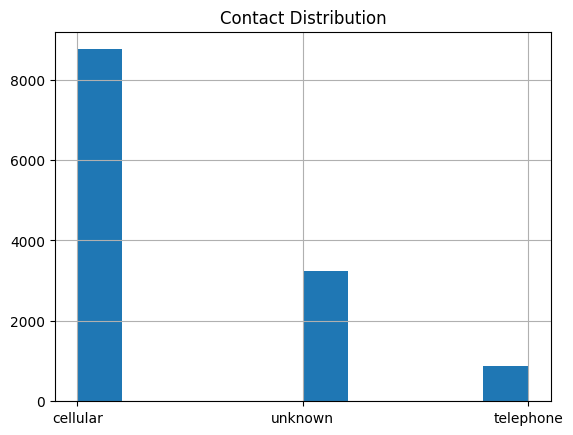

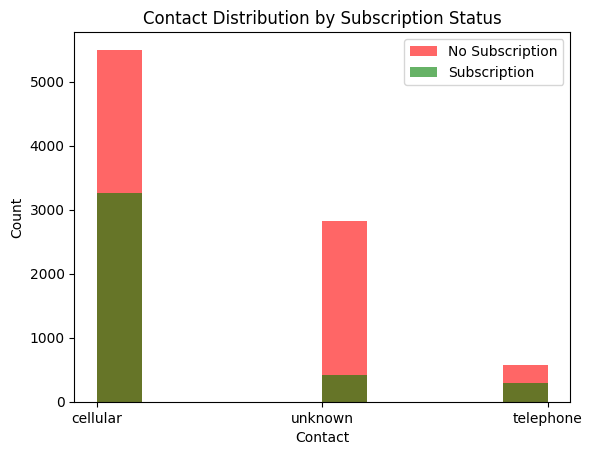

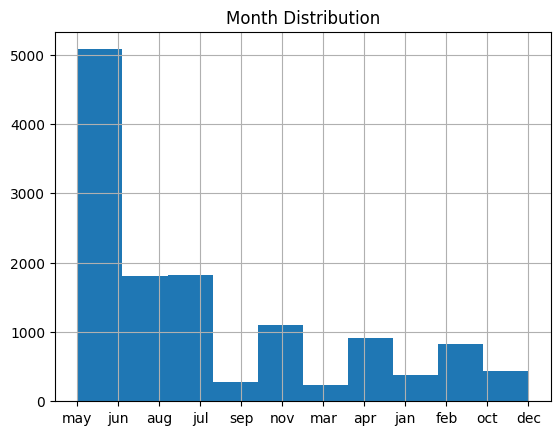

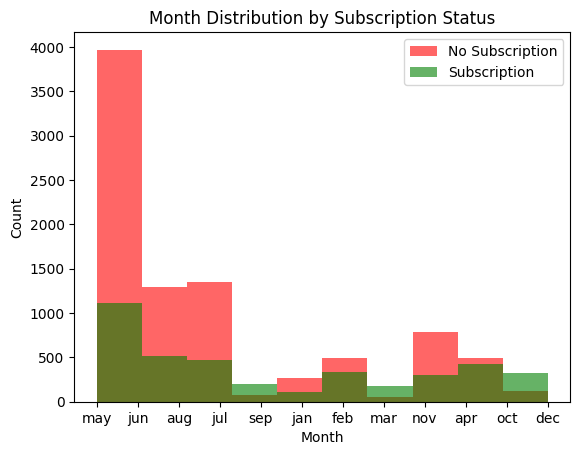

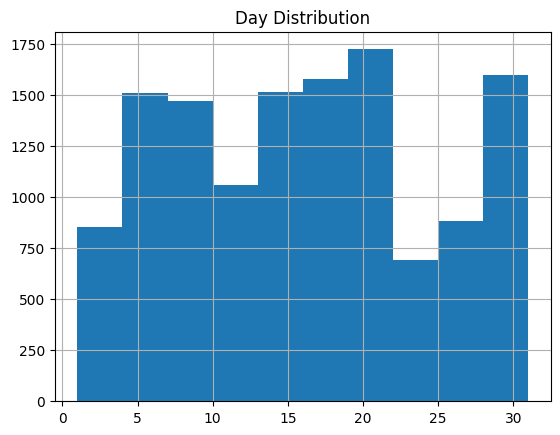

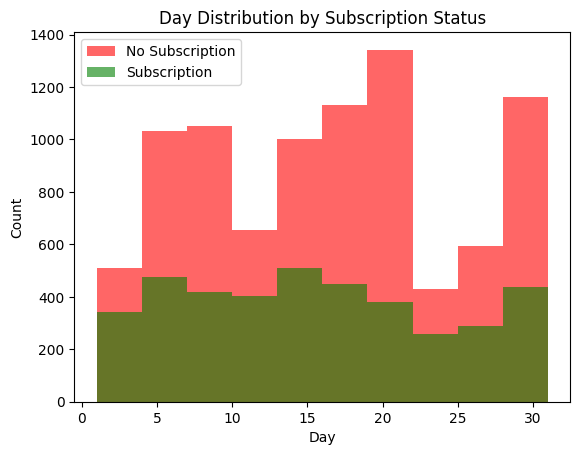

In [2148]:
variables = ['contact', 'month', 'day']
for var in variables:

    # Plotting the histogram for each variable
    df[var].hist()
    plt.title(f'{var.capitalize()} Distribution')
    plt.show()

    # Plotting the histogram for each variable by subscription status
    plt.hist(df[var][df['y'] == 'no'], color='red',alpha=0.6, label='No Subscription')
    plt.hist(df[var][df['y'] == 'yes'], color='green',alpha=0.6, label='Subscription')

    plt.title(f'{var.capitalize()} Distribution by Subscription Status')
    plt.xlabel(f'{var.capitalize()}')
    plt.ylabel('Count')
    plt.legend()

    plt.show()

# Feature Engineering

In [2149]:
df.isnull().values.sum()

0

In [2150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         12870 non-null  int64 
 1   age        12870 non-null  int64 
 2   job        12870 non-null  object
 3   marital    12870 non-null  object
 4   education  12870 non-null  object
 5   default    12870 non-null  object
 6   balance    12870 non-null  int64 
 7   housing    12870 non-null  object
 8   loan       12870 non-null  object
 9   contact    12870 non-null  object
 10  day        12870 non-null  int64 
 11  month      12870 non-null  object
 12  campaign   12870 non-null  int64 
 13  pdays      12870 non-null  int64 
 14  previous   12870 non-null  int64 
 15  poutcome   12870 non-null  object
 16  y          12870 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.7+ MB


### Extract Null Values

No null values.

### Convert text to numbers

In [2151]:
le = LabelEncoder()

# Apply label encoding to each categorical variable
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])

df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,9,2,2,0,18254,0,0,0,11,8,2,-1,0,3,0
1,22677,26,7,2,1,0,512,1,1,2,5,6,3,-1,0,3,0
2,10541,30,4,2,1,0,135,0,0,0,14,1,2,-1,0,3,0
3,13689,41,9,1,3,0,30,1,0,0,10,5,1,-1,0,3,0
4,11304,27,0,2,1,0,321,0,1,2,2,11,1,-1,0,3,0


In [2152]:
X_prelim = df[['age','job','marital','education','default','balance','housing','loan', 'contact', 'day', 'month', 'campaign','pdays','previous','poutcome']].values


#X_prelim = df[['age','job','marital','education','default','balance','housing','loan', 'month', 'campaign','pdays','previous','poutcome']].values

#X = df[['balance','age','job','campaign','poutcome', 'pdays','loan', 'default', 'housing', 'previous','education','marital', 'month', 'day']].values
#B. X = df[['balance','age','job','campaign','poutcome', 'pdays','loan', 'default', 'housing', 'previous','education','marital', 'month', 'day']].values
#1. X = df[['balance','age','job','campaign','poutcome','loan', 'default', 'housing', 'previous']].values
#2. X = X = df[['balance','age','job','poutcome','loan','housing', 'previous']].values
#3. X = df[['balance','age','job','poutcome','loan', 'default','housing', 'previous']].values
#4. X = df[['balance','age','job','education', 'campaign','poutcome','loan', 'default','housing', 'previous']].values
#5. X = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']].values
#6. X = df[['balance','age','job','marital','poutcome','loan', 'default', 'housing']].values

#X = df[['balance','age','job','campaign','poutcome','loan', 'default', 'housing', 'previous']].values


In [2153]:
y = df['y'].values

### Feature Selection

In [2154]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
X = selector.fit_transform(X_prelim, y)


In [2155]:
selected_indices = selector.get_support(indices=True)
varList = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome']
for i in range(len(varList)):
    print(i, " : ", varList[i])
print ()
print("Selected Feature Indices:", selected_indices)

0  :  age
1  :  job
2  :  marital
3  :  education
4  :  default
5  :  balance
6  :  housing
7  :  loan
8  :  contact
9  :  day
10  :  month
11  :  campaign
12  :  pdays
13  :  previous
14  :  poutcome

Selected Feature Indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [2156]:
X.shape

(12870, 15)

In [2157]:
y.shape

(12870,)

In [2158]:
X

array([[ 29,   9,   2, ...,  -1,   0,   3],
       [ 26,   7,   2, ...,  -1,   0,   3],
       [ 30,   4,   2, ...,  -1,   0,   3],
       ...,
       [ 37,  10,   2, ..., 172,   2,   0],
       [ 42,   4,   1, ...,  -1,   0,   3],
       [ 24,   7,   2, ...,  -1,   0,   3]])

# Normalize

In [2159]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.06952791,  1.4095278 ,  1.31182593, ..., -0.44574006,
        -0.33614417,  0.48099775],
       [-1.33489437,  0.79491436,  1.31182593, ..., -0.44574006,
        -0.33614417,  0.48099775],
       [-0.98107242, -0.12700578,  1.31182593, ..., -0.44574006,
        -0.33614417,  0.48099775],
       ...,
       [-0.36188399,  1.71683451,  1.31182593, ...,  1.21062851,
         0.6396482 , -2.5461128 ],
       [ 0.08039346, -0.12700578, -0.30533879, ..., -0.44574006,
        -0.33614417,  0.48099775],
       [-1.51180535,  0.79491436,  1.31182593, ..., -0.44574006,
        -0.33614417,  0.48099775]])

In [2160]:
y

array([0, 0, 0, ..., 0, 0, 0])

# Train/Test Split

In [2161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((10296, 15), (2574, 15))

# Model Selection

In [2162]:
import tensorflow as tf
from keras import backend as K

precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

def f1Score(y_true, y_pred):
    precision.update_state(y_true, y_pred)
    recall.update_state(y_true, y_pred)
    precision_value = precision.result()
    recall_value = recall.result()
    precision.reset_states()
    recall.reset_states()
    return 2 * ((precision_value * recall_value) / (precision_value + recall_value + K.epsilon()))

## Logistic Regression

In [2163]:
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression()
logRegModel.fit(X_train,y_train)

LogisticRegression()

In [2164]:
logRegModel.score(X_test,y_test)

0.7338772338772339

In [2165]:
y_pred = logRegModel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1Score(y_test, y_pred).numpy())
print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7338772338772339
Precision: 0.6094674556213018
Recall: 0.27140974967061926
F1-Score: 0.37556967
AUC: 0.5993412384716732


## Support Vector Machine (SVM)

In [2166]:
from sklearn import svm
svmModel = svm.SVC()
svmModel.fit(X_train,y_train)

SVC()

In [2167]:
svmModel.score(X_test,y_test)

0.7684537684537684

In [2168]:
y_pred = svmModel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1Score(y_test, y_pred).numpy())
print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7684537684537684
Precision: 0.7173333333333334
Recall: 0.3544137022397892
F1-Score: 0.4744267
AUC: 0.6480057491915199


## K-Nearest Neighbors(KNN)

In [2169]:
from sklearn.neighbors import KNeighborsClassifier
knnModel=KNeighborsClassifier()
knnModel.fit(X_train, y_train)

KNeighborsClassifier()

In [2170]:
knnModel.score(X_test, y_test)

0.736985236985237

In [2171]:
y_pred = knnModel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1Score(y_test, y_pred).numpy())
print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.736985236985237
Precision: 0.5753676470588235
Recall: 0.41238471673254284
F1-Score: 0.4804297
AUC: 0.6425559947299079


## Random Forest




In [2172]:
from sklearn.ensemble import RandomForestClassifier
ranForModel = RandomForestClassifier()
ranForModel.fit(X_train, y_train)

RandomForestClassifier()

In [2173]:
ranForModel.score(X_test, y_test)

0.7871017871017871

In [2174]:
y_pred = ranForModel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1Score(y_test, y_pred).numpy())
print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7871017871017871
Precision: 0.697196261682243
Recall: 0.4914361001317523
F1-Score: 0.5765069
AUC: 0.7010899508923225


## Neural Networks

### Multi Layer Perception (MLP)

In [2175]:
from sklearn.neural_network import MLPClassifier
mlpModel = MLPClassifier(hidden_layer_sizes=(90))
mlpModel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=90)

In [2176]:
mlpModel.score(X_test, y_test)

0.7595182595182595

In [2177]:
y_pred = mlpModel.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1Score(y_test, y_pred).numpy())
print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7595182595182595
Precision: 0.6434426229508197
Recall: 0.4137022397891963
F1-Score: 0.5036086
AUC: 0.6589172355970775


### TensorFlow Neural Network

In [2178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2179]:
tfModel = Sequential ( [
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [2180]:
tfModel.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                  tf.keras.metrics.BinaryAccuracy(),
                  tf.keras.metrics.Precision(),
                  tf.keras.metrics.Recall(),
                  tf.keras.metrics.AUC(),
                  f1Score
              ])

In [2181]:
tfModel.fit(X_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
161/161 [==============================] - 2s 3ms/step - loss: 0.5769 - binary_accuracy: 0.7020 - precision_84: 0.5590 - recall_84: 0.2067 - auc_42: 0.6822 - f1Score: 0.2804
Epoch 2/20
161/161 [==============================] - 0s 2ms/step - loss: 0.5387 - binary_accuracy: 0.7398 - precision_84: 0.6492 - recall_84: 0.3588 - auc_42: 0.7404 - f1Score: 0.4489
Epoch 3/20
161/161 [==============================] - 0s 2ms/step - loss: 0.5289 - binary_accuracy: 0.7484 - precision_84: 0.6694 - recall_84: 0.3806 - auc_42: 0.7499 - f1Score: 0.4770
Epoch 4/20
161/161 [==============================] - 0s 2ms/step - loss: 0.5232 - binary_accuracy: 0.7539 - precision_84: 0.6874 - recall_84: 0.3853 - auc_42: 0.7559 - f1Score: 0.4868
Epoch 5/20
161/161 [==============================] - 0s 3ms/step - loss: 0.5185 - binary_accuracy: 0.7598 - precision_84: 0.6954 - recall_84: 0.4077 - auc_42: 0.7615 - f1Score: 0.5052
Epoch 6/20
161/161 [==============================] - 0s 3ms/step - loss: 0

In [2182]:
loss, accuracy, auc, precision, recall, f1_score = tfModel.evaluate(X_test, y_test)

print('Accuracy: %.5f' % accuracy)
print('Precision: %.5f' % precision)
print('Recall: %.5f' % recall)
print('F1-score: %.5f' % f1_score)
print('AUC: %.5f' % auc)

81/81 [==============================] - 1s 2ms/step - loss: 0.5200 - binary_accuracy: 0.7599 - precision_84: 0.6402 - recall_84: 0.4242 - auc_42: 0.7486 - f1Score: 0.4975
Accuracy: 0.75991
Precision: 0.42424
Recall: 0.74860
F1-score: 0.49748
AUC: 0.64016


# Create Predictions

In [2183]:
dfTest = pd.read_csv('test.csv')

In [2184]:
dfTest.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,53608,32,management,single,tertiary,no,12569,no,no,cellular,1,jul,2,295,2,success
1,51055,25,services,single,secondary,no,801,no,no,cellular,5,jun,2,-1,0,unknown
2,52573,46,blue-collar,married,secondary,no,1728,yes,no,unknown,26,may,2,-1,0,unknown
3,50458,39,management,divorced,secondary,no,51,no,no,unknown,17,jun,2,-1,0,unknown
4,52272,31,services,single,tertiary,no,1626,no,no,unknown,31,jul,1,-1,0,unknown


In [2185]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         4291 non-null   int64 
 1   age        4291 non-null   int64 
 2   job        4291 non-null   object
 3   marital    4291 non-null   object
 4   education  4291 non-null   object
 5   default    4291 non-null   object
 6   balance    4291 non-null   int64 
 7   housing    4291 non-null   object
 8   loan       4291 non-null   object
 9   contact    4291 non-null   object
 10  day        4291 non-null   int64 
 11  month      4291 non-null   object
 12  campaign   4291 non-null   int64 
 13  pdays      4291 non-null   int64 
 14  previous   4291 non-null   int64 
 15  poutcome   4291 non-null   object
dtypes: int64(7), object(9)
memory usage: 536.5+ KB


In [2186]:
le = LabelEncoder()

# Apply label encoding to each categorical variable
dfTest['job'] = le.fit_transform(dfTest['job'])
dfTest['marital'] = le.fit_transform(dfTest['marital'])
dfTest['education'] = le.fit_transform(dfTest['education'])
dfTest['default'] = le.fit_transform(dfTest['default'])
dfTest['housing'] = le.fit_transform(dfTest['housing'])
dfTest['loan'] = le.fit_transform(dfTest['loan'])
dfTest['contact'] = le.fit_transform(dfTest['contact'])
dfTest['month'] = le.fit_transform(dfTest['month'])
dfTest['poutcome'] = le.fit_transform(dfTest['poutcome'])

dfTest.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,53608,32,4,2,2,0,12569,0,0,0,1,5,2,295,2,2
1,51055,25,7,2,1,0,801,0,0,0,5,6,2,-1,0,3
2,52573,46,1,1,1,0,1728,1,0,2,26,8,2,-1,0,3
3,50458,39,4,0,1,0,51,0,0,2,17,6,2,-1,0,3
4,52272,31,7,2,2,0,1626,0,0,2,31,5,1,-1,0,3


In [2187]:
X_new = dfTest[['age','job','marital','education','default','balance','housing','loan', 'contact', 'day', 'month', 'campaign','pdays','previous','poutcome']].values


In [2188]:
X_new.shape

(4291, 15)

In [2189]:
X_new = sc.transform(X_new)

In [2190]:
X_new

array([[-0.80416144, -0.12700578,  1.31182593, ...,  2.38827783,
         0.6396482 , -0.5280391 ],
       [-1.42334986,  0.79491436,  1.31182593, ..., -0.44574006,
        -0.33614417,  0.48099775],
       [ 0.43421542, -1.04892593, -0.30533879, ..., -0.44574006,
        -0.33614417,  0.48099775],
       ...,
       [-0.09651752, -1.35623264, -0.30533879, ..., -0.44574006,
        -0.33614417,  0.48099775],
       [-0.18497301, -1.04892593, -0.30533879, ...,  2.20636452,
         1.12754438, -1.53707595],
       [ 0.43421542,  0.48760765, -0.30533879, ..., -0.44574006,
        -0.33614417,  0.48099775]])

In [2191]:
y_pred = ranForModel.predict(X_new)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [2192]:
df_submission = {'ID': dfTest['ID'], 'y': y_pred}
df_submission = pd.DataFrame(data=df_submission)

In [2193]:
df_submission.head()

,ID,y
0,53608,1
1,51055,1
2,52573,0
3,50458,0
4,52272,0


In [2194]:
df_submission.to_csv('submission.csv', index=False)